__Задача 1.__ 

Сведя задачу 

$$
y^{\prime \prime}-10 y^{\prime}-11 y=0, \quad y(0)=1, \quad y^{\prime}(0)=-1
$$ 

к системе уравнений первого порядка, решить ее численно на интервале $[0,10]$, воспользовавшись любым методом. Проанализируйте полученные результаты.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [62]:
def runge_method(a: np.ndarray, u0: np.ndarray, T: float, dt: float) -> tuple:
    """Решение системы ОДУ явным методом Рунге-Кутта второго порядка(методом Эйлера с пересчетом)

    Args:
        a (np.ndarray): 2*2 матрица правой части уравнения
        u0 (np.ndarray): вектор начального условия
        T (float): решение ищется в пределах (0, T)
        dt (float): временной шаг

    Returns:
        tuple(np.ndarray, np.ndarray): время и зависимость решения от времени
    """
    steps_num = int(T / dt) + 1
    time = np.arange(steps_num) * dt
    y = np.zeros((steps_num, 2))
    y[0] = u0
    for i in range(1, steps_num):
        k1 = a @ y[i - 1]
        k2 = a @ (y[i - 1] + dt * k1)
        y[i] = y[i - 1] + dt * (k1 + k2) / 2
    return time, y

In [64]:
system_matrix = np.array([[0, 1], [11, 10]])
time, solution = runge_method(a = system_matrix,
                              u0 = np.array([1, -1]),
                              T = 10,
                              dt = 1e-4)


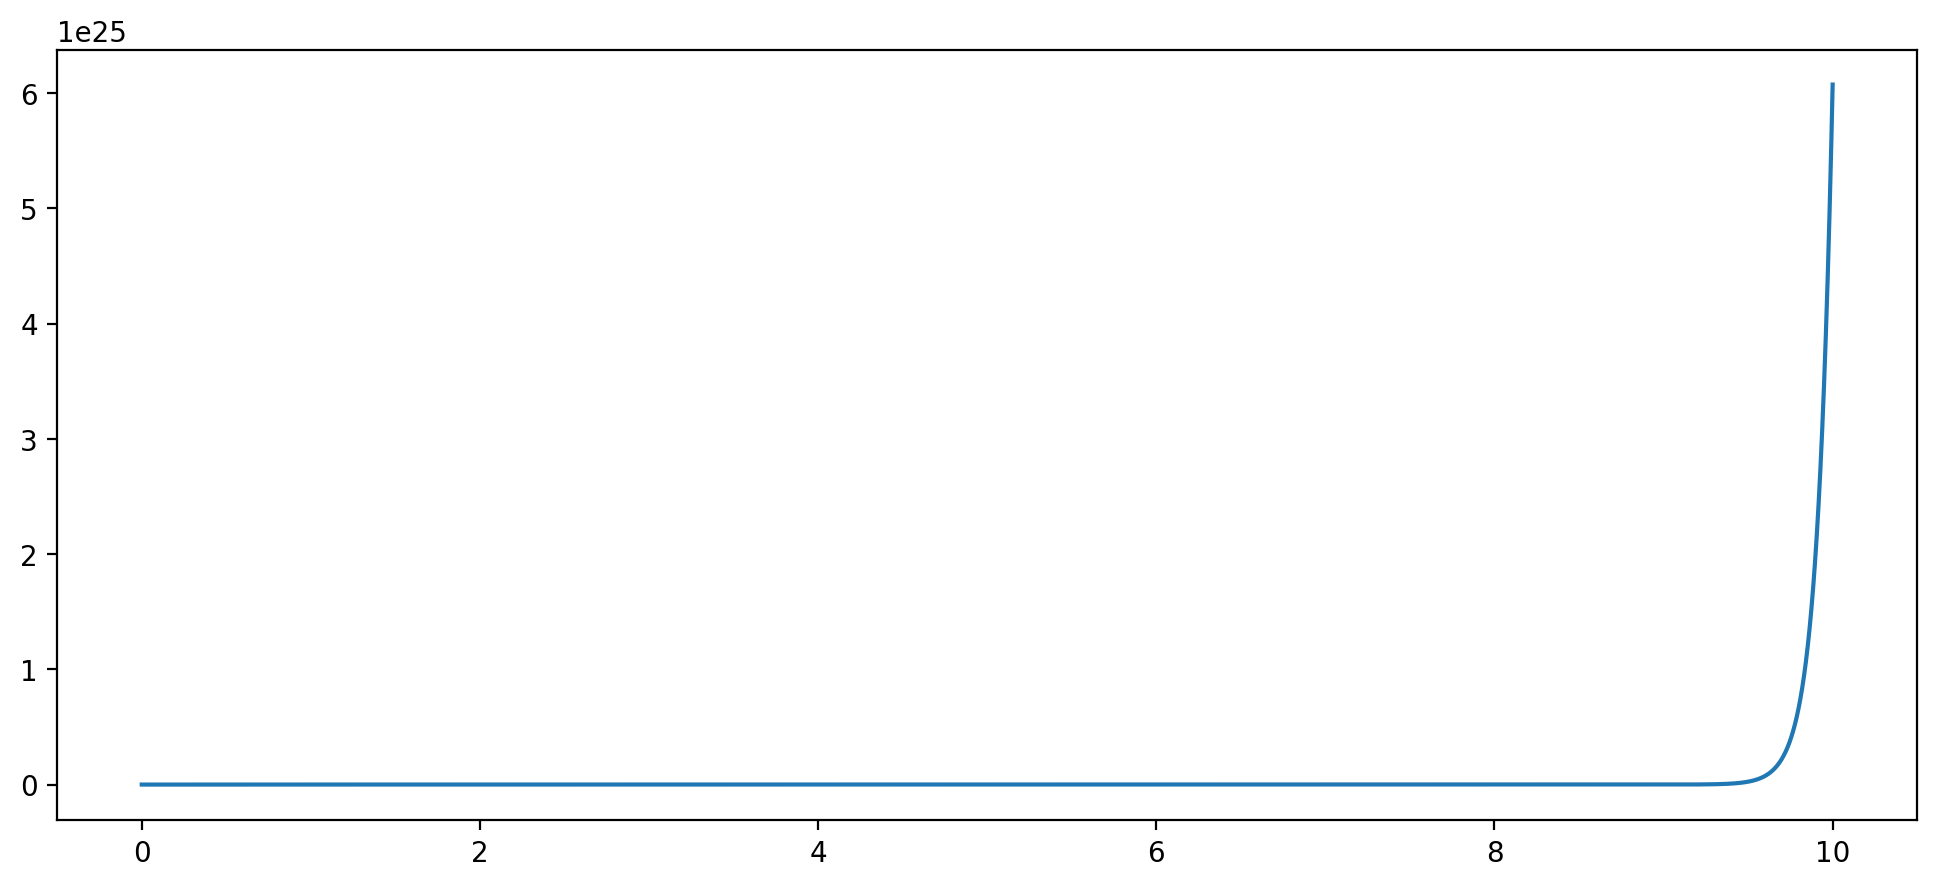

In [65]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(time, solution[:, 0])


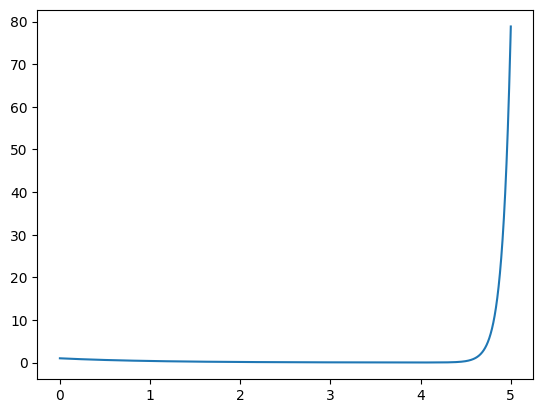

In [66]:
plt.plot(time[:50000], solution[:, 0][:50000])

Аналитическое решение представляется суммой двух экспоненет. На графике заметен характерный экспоненциальный спад, затем экпоненциальный рост. Экспоненциальный спад соответствует $\lambda_1 = -1$. Рост $\lambda_2  = 11$

__Задача 2.__ 

Реализовать алгоритм метода стрельбы для вычисления решения следующей нелинейной задачи:

$$
\left\{\begin{array}{c}y^{\prime \prime}-x \sqrt{y}=0, \quad 0 \leq x \leq 1, \\ y(0)=0, \quad y(1)=2 ;\end{array}\right.
$$

__Ньютон__

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import typing as tp 
import scipy.optimize as opt 

In [2]:
right_function_type = tp.Callable[[np.ndarray, np.ndarray],
                                   np.ndarray] #тип функции правой части. Два аргумента - y, x

def newton_method(f: right_function_type,
                  l: float,
                  bound_vals: tp.Tuple[float, float],
                  steps_num :int = int(1e2)) -> tp.Tuple[np.ndarray, np.ndarray]:
    """

    Args:
        f (right_function_type): функция правой части
        l (float): правая граница
        bound_vals (tp.Iterable[float, float]): граничне значения слева и справа
        steps_num (int, optional): количество шагов. Defaults to int(1e2).

    Returns:
        tp.Tuple[np.ndarray, np.ndarray]: зависимость решения от времени
    """
    def system_function(phi_without_bounds: np.ndarray):
        second_deriv_approximation = np.roll(phi_without_bounds, -1) - 2 * phi_without_bounds + np.roll(phi_without_bounds, 1)
        second_deriv_approximation[0] = -2 * phi_without_bounds[0] + phi_without_bounds[1] + bound_vals[0]
        second_deriv_approximation[-1] = -2 * phi_without_bounds[-1] + phi_without_bounds[-2] + bound_vals[-1]
        return second_deriv_approximation / delta_x - f(phi_without_bounds, x_vals)
    delta_x = l / steps_num
    x_vals = np.linspace(delta_x, l - delta_x, steps_num - 2, endpoint = True)
    phi = opt.newton(system_function, np.random.random(steps_num - 2), maxiter=int(1e4))
    return np.concatenate([[0], x_vals, [l]]), np.concatenate([[bound_vals[0]], phi, [bound_vals[-1]]])

In [29]:
right_func = lambda x, y: np.sqrt(y) * x
time, y = newton_method(right_func, l = 1, bound_vals=[0, 2], steps_num=10)

Text(0.5, 1.0, 'Решение методом Ньютона(сведение задачи к системе уравнений)')

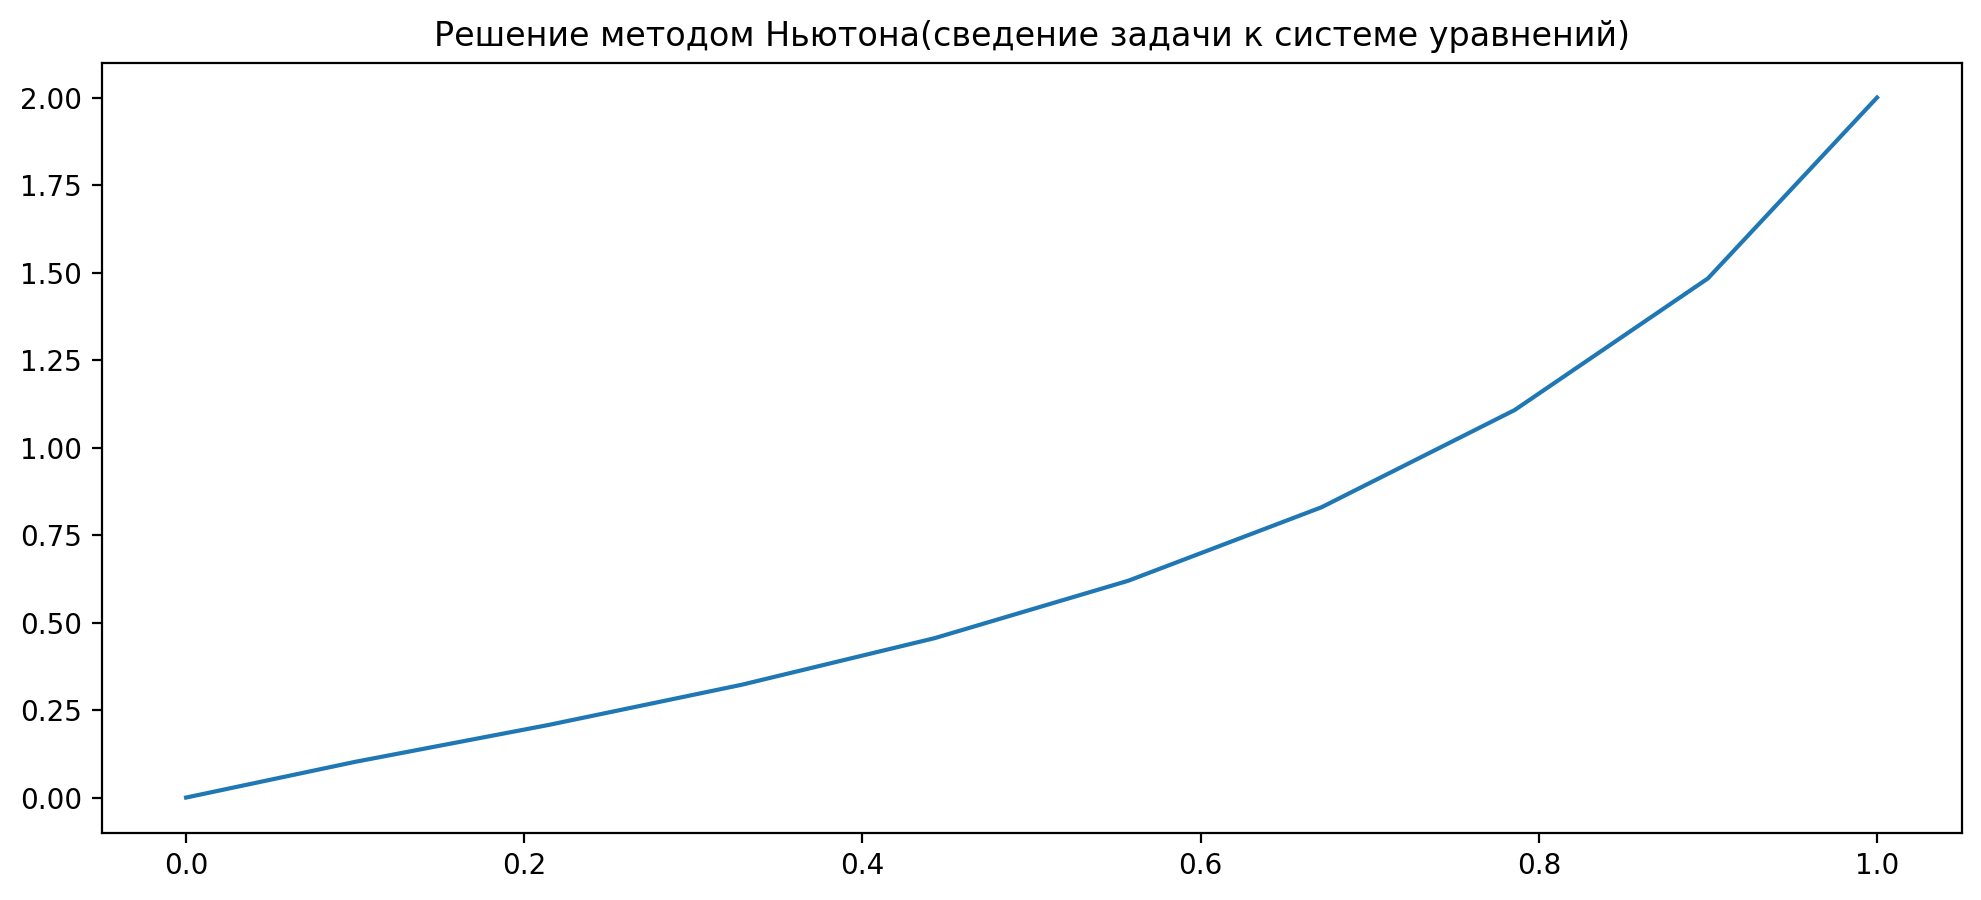

In [30]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(time, y)
plt.title("Решение методом Ньютона(сведение задачи к системе уравнений)")

__Задача 3.__

Решите следующее УРЧП __любым численным способом__. Визуализируйте полученное решение. Есть ли сходимость?

$$
\begin{aligned}
& u_t=u_{x x}+\left(4 x /\left(x^2+2 t+1\right)\right) u_x, \quad 0 \leq x \leq 1,\quad 0<t \\
& u(0, t)=1 /(2 t+1), \quad u(1, t)=1 /(2(t+1)),\quad u(x, 0)=1 /\left(x^2+1\right)
\end{aligned}
$$

__Самая простая явная схема__

Порядок аппроксимации по времени - первый
По координате второй


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [31]:

# Parameters
L = 1.0
T = 0.2
Nx = 100
Nt = 10000 
h = L/(Nx-1)
tau = T/(Nt-1)
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)


T_a, X_a = np.meshgrid(t, x)

f_grid = 4 * X_a / (np.power(X_a, 2) + 2 * T_a + 1)

# Initial and boundary conditions
def u0(x):
    return 1/(x**2 + 1)

def ul(t):
    return 1/(2*t + 1)

def ur(t):
    return 1/(2*(t + 1))




r = tau/(h**2)
u = np.zeros((Nx, Nt))

u[:, 0] = u0(x)

for n in range(Nt-1):
    u[0, n+1] = ul(t[n+1])
    u[-1, n+1] = ur(t[n+1])
    for m in range(1, Nx-1):
        u[m, n+1] = u[m, n] + (u[m-1, n] - 2*u[m, n] + u[m+1, n]) * tau / np.power(h, 2) +  f_grid[m, n] * (u[m + 1, n] - u[m - 1, n])* 0.5 * tau / h

In [32]:
from matplotlib import cm

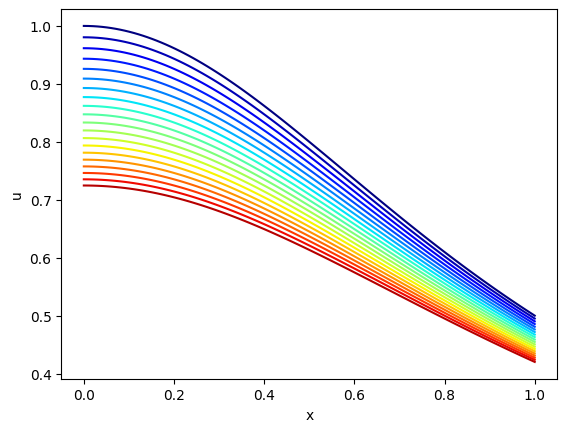

In [33]:
# Plot every 100th timestep
fig, ax = plt.subplots()
for n in range(0, Nt, int(Nt / 20)):
    color = cm.jet(n/Nt)
    ax.plot(x, u[:, n], color=color, label=f"t={t[n]:.2f}")
ax.set_xlabel("x")
ax.set_ylabel("u")
norm = plt.Normalize(0, T)
cmap = cm.jet
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
# cbar = fig.colorbar(sm)
# cbar.ax.set_ylabel("Time")
plt.show()


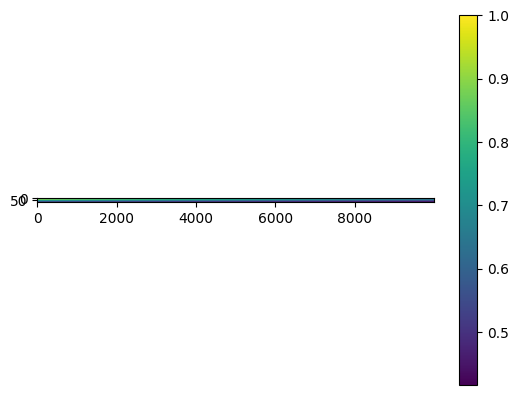

In [34]:
plt.imshow(u)
plt.colorbar()

__вывод__

Представленная выше разностная схема кажется расходится. Для проверки сходиомсти можно использовать спектральный признак, но времени малоо(

    Лучше строить неявную схему